In [15]:
# Importando pacotes 
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')

# Comando para que os gráficos sejam apresentados no próprio notebook
%matplotlib inline

In [2]:
# Importando dados
treino = pd.read_csv("dataset_treino_smt.csv")
teste = pd.read_csv("dataset_teste_ajustado.csv")

In [3]:
# Verificando se os dados de treino foram importados corretamente
treino.head()

,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade,classe
0,0.587736,0.715052,-0.073629,0.644527,0.250925,0.105735,0.387427,1.362114,1
1,-0.924164,-1.300379,-0.590696,-0.073827,-0.618340,-0.943243,-0.449938,-0.281323,0
2,1.192496,1.834736,-0.763052,0.285350,0.250925,-1.437761,0.523954,-0.194826,1
3,-0.924164,-1.172416,-0.590696,-0.792181,-0.618340,-0.718462,-1.008180,-1.146289,0
4,-1.226543,0.363151,-2.831319,0.644527,0.175803,1.529348,5.426782,-0.108329,1


In [4]:
# Verificando se os dados de teste foram importados corretamente
teste.head()

,id,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade
0,1,-0.863943,-0.539336,1.157383,-1.299796,-0.259334,-0.858156,-0.125604,-0.791337
1,2,0.593310,-0.942338,-0.130301,-0.036105,-0.259334,-1.380568,-0.809234,-0.444450
2,3,-0.863943,-0.001999,0.030659,0.848478,-0.259334,-0.750601,-1.102218,-0.271006
3,4,0.884761,0.871173,0.352580,-0.036105,-0.194128,0.386413,0.824968,1.810320
4,5,0.010409,1.979430,-0.130301,-0.036105,-0.259334,-0.658410,-0.737615,0.249326


In [5]:
# Definindo as variáveis preditoras
features = teste.drop(['id'], axis=1).columns

In [6]:
# Organizando os parametros
param = {
    'objective': 'binary:hinge'
    ,'booster' : "gbtree"
    ,'eta': 0.02
    ,'max_depth':20
    ,'subsample':0.75
    ,'colsample_bytree':0.25
    ,'silent' : 1
    ,'eval_metric': 'error'
}

# Separando dados de treino e validação
X_train, X_test, y_train, y_test = train_test_split(treino[features], treino['classe'], test_size = 0.25)

# Organizando o formato dos dados para o algoritmo
dtrain = xgb.DMatrix(X_train, y_train)
dvalid = xgb.DMatrix(X_test, y_test)
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]

# Treinando o modelo
modelo_xgb = xgb.train(param, dtrain, 10000, evals=watchlist, early_stopping_rounds=250, verbose_eval=50)

[0]	train-error:0.498299	eval-error:0.505102
Multiple eval metrics have been passed: 'eval-error' will be used for early stopping.

Will train until eval-error hasn't improved in 250 rounds.
[50]	train-error:0.052721	eval-error:0.229592
[100]	train-error:0.001701	eval-error:0.122449
[150]	train-error:0	eval-error:0.122449
[200]	train-error:0	eval-error:0.117347
[250]	train-error:0	eval-error:0.112245
[300]	train-error:0	eval-error:0.107143
[350]	train-error:0	eval-error:0.107143
[400]	train-error:0	eval-error:0.107143
[450]	train-error:0	eval-error:0.107143
Stopping. Best iteration:
[214]	train-error:0	eval-error:0.096939



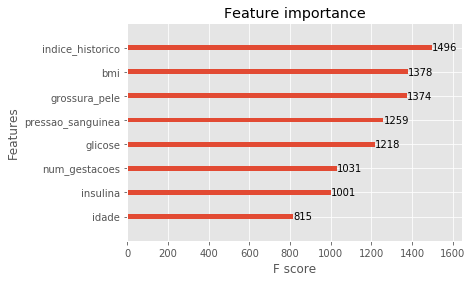

In [19]:
# Gráfico para avaliar a importância de cada variáveis para o modelo. 
plt.style.use('ggplot')
plot_importance(modelo_xgb)
plt.show()

In [20]:
predictions = modelo_xgb.predict(xgb.DMatrix(teste[features]))
predictions

array([0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [21]:
predictions = [int(i) for i in predictions]
sum(predictions)

69

In [22]:
resposta = pd.DataFrame({"id":teste["id"].values})
resposta["classe"] = predictions
resposta.to_csv("./xgb_resposta.csv", index=False)

## Resultados:
* Public Score: 0.72
* Private Score: 0.69